In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import os
import numpy as np
import pandas as pd

%matplotlib inline

from scipy import stats, integrate

sns.set(color_codes=True)

# Read File

In [5]:
file =r"C:\Users\gisel\Desktop\Cyber-master\final UN concatenate_df_temp.csv"
df = pd.read_csv(file, encoding = "ISO-8859-1")
country_list = df['Country'].unique()

In [6]:
#Select Country
print('Choose a country:\n\n 1. Afghanistan'+'\n','2. Albania'+'\n','3. Australia'+'\n','4. Austria'+'\n',
      '5. Azerbaijan'+'\n','6. Bangladesh'+'\n','7. Brazil'+'\n',
      '8. Chile\n','9. China\n','10. Colombia\n', '11. Croatia\n', '12. Cyprus\n', '13. Czech\n', 
      '14. Danish\n', '15. Denmark\n','16. Egypt\n', '17. Estonia\n', '18. Finland\n', '19. France\n', '20. Georgia\n', 
      '21. Germany\n','22. Ghana\n', '23. Hungary\n', '24. Iceland\n', '25. India\n', '26. Ireland\n',
       '27. Israel\n', '28. Jamaica\n', '29. Jordan\n', '30. Kenya\n', '31. Lithuania\n','32. Luxembourg\n',
       '33. Malawi\n','34. Malaysia\n', '35. Malta\n','36. Mauritania\n', '37. Micronesia\n', 
      '38. Mita \n', '39. Moldova\n', '40. Montenegro\n','41. Morocco\n', '42. Netherlands\n', '43. New Zealand\n', 
      '44. Nigeria\n', '45. Norway\n', '46. Philippine\n', '47. Poland\n', 
      '48. Portuguese\n','49. Qatar\n', '50. Russia\n', '51. Rwanda\n', '52. SaudiArabia\n', 
       '53. Singapore\n', '54. Slovenia\n', '55. South Africa\n','56. Spain\n', 
      '57. Sweden\n', '58. Switzerland\n', '59. Trinidad Tobago\n', '60. Turkey\n','61. Uganda\n', '62. UK\n',
      '63. UnitedStates\n')
select_index = input("Which one you want to: ")
country_selected = country_list[int(select_index)-1]
print('\n Your selected country is: ', country_selected)

Choose a country:

 1. Afghanistan
 2. Albania
 3. Australia
 4. Austria
 5. Azerbaijan
 6. Bangladesh
 7. Brazil
 8. Chile
 9. China
 10. Colombia
 11. Croatia
 12. Cyprus
 13. Czech
 14. Danish
 15. Denmark
 16. Egypt
 17. Estonia
 18. Finland
 19. France
 20. Georgia
 21. Germany
 22. Ghana
 23. Hungary
 24. Iceland
 25. India
 26. Ireland
 27. Israel
 28. Jamaica
 29. Jordan
 30. Kenya
 31. Lithuania
 32. Luxembourg
 33. Malawi
 34. Malaysia
 35. Malta
 36. Mauritania
 37. Micronesia
 38. Mita 
 39. Moldova
 40. Montenegro
 41. Morocco
 42. Netherlands
 43. New Zealand
 44. Nigeria
 45. Norway
 46. Philippine
 47. Poland
 48. Portuguese
 49. Qatar
 50. Russia
 51. Rwanda
 52. SaudiArabia
 53. Singapore
 54. Slovenia
 55. South Africa
 56. Spain
 57. Sweden
 58. Switzerland
 59. Trinidad Tobago
 60. Turkey
 61. Uganda
 62. UK
 63. UnitedStates

Which one you want to: 63

 Your selected country is:  UnitedStates


# Category Distribution of selected country

In [7]:
# filter country selected
df_country = df[df['Country'] == country_selected]
df_country = df_country[df_country['category'] != 'category unknown']

df_count = df_country['Sentence'].groupby(df['category'])\
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
print('Country:', country_selected)
print(df_count)

Country: UnitedStates
                  category  count
4    ORGANIZATION MEASURES    574
5       TECHNICAL MEASURES    291
3           LEGAL MEASURES    215
2              COOPERATION    125
0        CAPACITY BUILDING    106
1  CHILD ONLINE PROTECTION     26


Display chart of category distribution

Country: UnitedStates


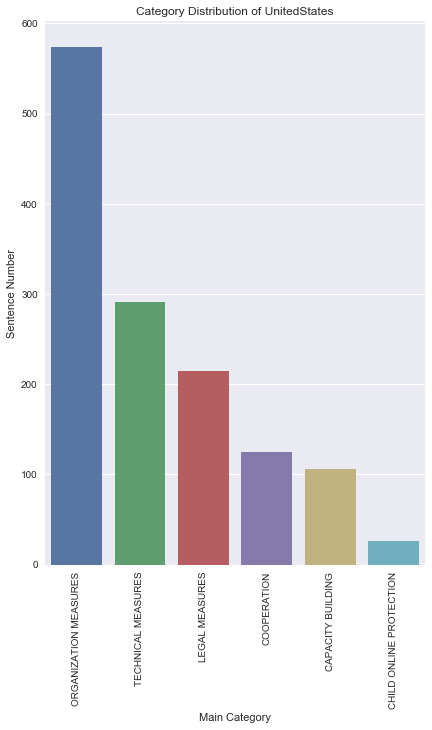

In [8]:
plt.figure(figsize=(15, 10))
# Type_1 的数量统计图
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='category', data=df_country,order = df_country['category'].value_counts().index)

plt.title('Category Distribution of '+country_selected)
plt.xticks(rotation='vertical')
plt.xlabel('Main Category')
plt.ylabel('Sentence Number')
print('Country:', country_selected)

# Choose a category you are intrested in

Display related sentences

In [9]:
def display_sentence(input_df,country_selected,selected_category):
    selected_df=input_df.filter(items=['SentenceID','Sentence','sub category'])
    print('\n\n','Selected Country:  ',country_selected)
    pd.set_option('display.max_colwidth', -1) 
    print(' Selected Category: ',selected_category)
    print(' Number of Sentences: ',len(selected_df))
    return selected_df

In [10]:
category_list = ['LEGAL MEASURES','CAPACITY BUILDING','TECHNICAL MEASURES','COOPERATION','CHILD ONLINE PROTECTION','ORGANIZATION MEASURES']
print(' 1. LEGAL MEASURES','\n','2. CAPACITY BUILDING','\n', '3. TECHNICAL MEASURES','\n',
      '4. COOPERATION','\n','5. CHILD ONLINE PROTECTION','\n', '6. ORGANIZATION MEASURES','\n')
selected_index = input('Choose a category you are interested in:')
selected_category = category_list[int(selected_index)-1]
print('Selected Category:\n',selected_category)

 1. LEGAL MEASURES 
 2. CAPACITY BUILDING 
 3. TECHNICAL MEASURES 
 4. COOPERATION 
 5. CHILD ONLINE PROTECTION 
 6. ORGANIZATION MEASURES 

Choose a category you are interested in:3
Selected Category:
 TECHNICAL MEASURES


# Sub-category Distribution of selected category of the country

In [11]:
print('Country:', country_selected)
print('Category:', selected_category)

# filter category selected
df_country = df[df['Country'] == country_selected]

#filter subcategory selected
df_sub_country = df_country[df_country['category'] == selected_category]
df_sub_country = df_sub_country[df_sub_country['sub category'] != 'category unknown']

#Sub-Category Count
subCat_counts = df_sub_country['Sentence'].groupby(df_sub_country['sub category'])
subCat_counts.size()

Country: UnitedStates
Category: TECHNICAL MEASURES


sub category
CERTIFICATION     13
CIRT             273
STANDARDS          5
Name: Sentence, dtype: int64

Country: UnitedStates
Category: TECHNICAL MEASURES


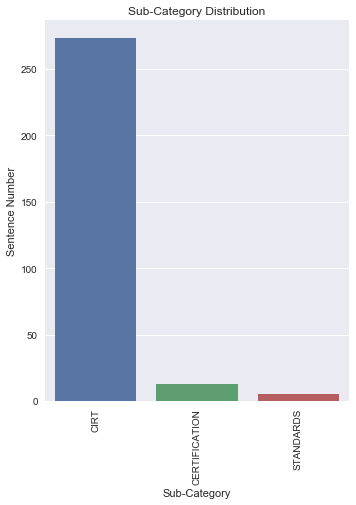

In [12]:
#Chart display
plt.figure(figsize=(12, 7))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='sub category', data=df_sub_country,order = df_sub_country['sub category'].value_counts().index )

plt.title('Sub-Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Category')
plt.ylabel('Sentence Number')
print('Country:', country_selected)
print('Category:', selected_category)

In [13]:
input_df = df_country[df_country['category'] == selected_category]
display_sentence(input_df,country_selected,selected_category)



 Selected Country:   UnitedStates
 Selected Category:  TECHNICAL MEASURES
 Number of Sentences:  291


,SentenceID,Sentence,sub category
20166,8686561,"The way business is transacted,government operates,and national defense is conducted have changed.",CIRT
20167,8686562,These activities now rely on an interdependent network of information technology infrastructures called cyberspace.,CIRT
20168,8686563,"TheNational Strategy to Secure Cyberspaceprovides a framework for protecting this infrastructure that is essential to our economy,security,and way of life.",CIRT
20172,8686630,Priority II: A National Cyberspace Security Threat and Vulnerability Reduction Program .,CIRT
20173,8686631,Priority III: A National Cyberspace Security Awareness and Training Program .,CIRT
20177,8686602,"Cyberspace is composed of hundreds of thousands of interconnected computers,servers, routers,switches,and fiber optic cables that allow our critical infrastructures to work.",CIRT
20178,8686603,"Thus, the healthy functioning of cyberspace is essential to our economy and our national security.",CIRT
20186,8686589,Minimize damage and recovery time from cyber attacks that do occur.,CIRT
20199,8686624,Public-private engagement is a key component of our Strategy to secure cyberspace.,CIRT
20200,8686625,This is true for several reasons.,CIRT


# Sub-category

In [14]:
print('  Country:  ',country_selected,'\n',
     ' Category: ',selected_category,'\n',
     ' Subcategories: ')
subcategory_list = [x for x in df_sub_country['sub category'].unique()]
for n,subca in enumerate(subcategory_list):
    print('\t',n+1,'.', subca)
index_ = input('Choose the subcategory you are interested in:')
selected_sub = subcategory_list[int(index_)-1]
print(selected_sub)

  Country:   UnitedStates 
  Category:  TECHNICAL MEASURES 
  Subcategories: 
	 1 . CIRT
	 2 . CERTIFICATION
	 3 . STANDARDS
Choose the subcategory you are interested in:3
STANDARDS


In [15]:
input_df = df_sub_country[df_sub_country['sub category'] == selected_sub]
print(' Sub-category: ',selected_sub)
display_sentence(input_df,country_selected,selected_category)

 Sub-category:  STANDARDS


 Selected Country:   UnitedStates
 Selected Category:  TECHNICAL MEASURES
 Number of Sentences:  5


,SentenceID,Sentence,sub category
20632,8686128,"processes and procedures that diminish the possibil- ities oferroneous code,malicious code,or trap doors that could be introduced during development.",STANDARDS
20686,8686084,"Colleges and universities are encouraged to secure their cyber systems by establishing some or all ofthe following as appropriate:( ) one or more ISACs to deal with cyber attacks and vulnerabilities;( ) model guidelines empowering ChiefInformation Officers (CIOs) to address cybersecurity;( ) one or more sets ofbest practices for IT security;and,( ) model user awareness programs and materials.",STANDARDS
20856,8686054,"providers of information technology products and services,and other organizations can make it easier for home users and small businesses to secure their systems.",STANDARDS
21412,8787176,"As such, DHS is examining and comparing different approaches and will seek industry consensus on approaches to be brought forward for consideration by standards organizations.",STANDARDS
21625,8787085,"Following on this research, international packet switching network standards were developed in collaboration with entities in other countries under the auspices of the ITU.",STANDARDS
